---
# Évaluation des modèles de régression
---

<center><img src="./img/mlprocess_4.png" alt="Processus d'apprentissage automatique" width="50%"/></center>

Dans cet exemple, nous allons évaluer, à l'aide des différentes métriques vues dans le cours, différents modèles de régression.

Dans un premier temps, nous allons repartir de l'exemple simple vu dans le module d'introduction (notre polynôme de degré 4) et évaluer trois modèles différents. Dans un second temps, nous allons évaluer le modèle de votre choix sur un ensemble de données public : les données des habitants de Californie.

Importons d'abord les librairies nécessaires.


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel 
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor

Générons les données sur notre polynôme de degré 4:

In [2]:
X_lin = np.linspace(-10,10,100)[:,np.newaxis]
def generate_data(N):
    x = np.random.uniform(-10,10,N)
    y = np.polyval([0.03, 0.2, -1, -10, 100],x) + np.random.normal(0.0, 15.0, N)
    return x.reshape(-1, 1), y

In [3]:
X,y = generate_data(200)

Et vérifions les données : 

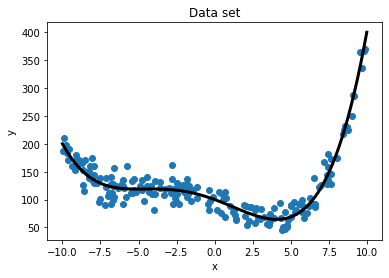

In [4]:
fig, ax = plt.subplots()
ax.plot(X, y, 'o')
ax.plot(np.linspace(-10,10,100), np.polyval([0.03, 0.2, -1, -10, 100],np.linspace(-10,10,100)), color='black', linewidth=3)
ax.set_title('Data set')
ax.set_ylabel('y')
ax.set_xlabel('x')
plt.show()

## Préparation des données train/validation/test 40% / 30% / 30%

Découpage du dataset en trois ensembles:

In [5]:
X_, X_test, y_, y_test = train_test_split(X, y, test_size=0.30)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=0.428)

## Calcul de l'erreur de Bayes sur l'ensemble de validation

Voici un exemple de calcul des métriques $R^2$, erreur quadratique moyenne (MSE) et erreur absolue moyenne (MAE), si on avait le modèle parfait (c.-à-d. la fonction originale). 


In [6]:
def f(x):
    return np.polyval([0.03, 0.2, -1, -10, 100],x)

R2 = r2_score(y_val, f(X_val))
MSE = mean_squared_error(y_val, f(X_val))
MAE = mean_absolute_error(y_val, f(X_val))
print('LR :', 'R2:', R2, 'MSE:', MSE, 'MAE:', MAE)

LR : R2: 0.9299460080389519 MSE: 231.81769262685756 MAE: 11.973429095647472


On ne peut pas faire mieux que ça avec ces métriques. Les nombres fournissent respectivement une borne supérieure pour le $R^2$ et des bornes inférieures pour la MSE et la MAE.

## Évaluation des métriques de 3 modèles sur l'ensemble de validation

En utilisant une régression linéaire ([`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)) voyons la performance que l'on peut obtenir. 

Essayez de visualiser le modèle résultant sur les données initiales afin de valider visuellement le résultat (profitons-en quand on peut).


In [7]:
#...

En utilisant le noyau ci-dessous (dont vous pouvez varier les hyperparamètres), reproduisez l'expérience avec un modèle de régression à base de processus gaussiens ([`GaussianProcessRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html))


In [8]:
kernel = 100.0 * RBF(length_scale=100.0, length_scale_bounds=(1e-2, 1e3)) \
               + WhiteKernel(noise_level=10, noise_level_bounds=(1e-10, 1e+3))

#...

Essayons enfin avec un perceptron multicouche ([`MLPRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html))

In [9]:
# ... 

Essayez plusieurs hyperparamètres et trouvez le meilleur modèle possible. Venez partager ensuite sur le forum le meilleur résultat que vous trouverez (en test ;-))


# Exemple 1 avec données réelles : [california housing](https://developers.google.com/machine-learning/crash-course/california-housing-data-description)

Essayons maintenant sur un ensemble de données réelles que vous avez probablement déjà vu dans le module de préparation de données. 

C'est l'ensemble de données utilisé dans le deuxième chapitre du livre d'Aurélien Géron "Hands-On Machine learning with Scikit-Learn and TensorFlow". Il constitue une excellente introduction à la mise en œuvre d'algorithmes d'apprentissage machine, car il nécessite un nettoyage rudimentaire des données, comporte une liste de variables facilement compréhensibles et se situe à une taille optimale entre être trop ludique et trop encombrant.

Les données contiennent des informations provenant du recensement de 1990 en Californie. Ainsi, même si elles ne vous aident pas à prévoir les prix actuels du logement, comme d'autres ensembles de données plus récentes, elles fournissent un ensemble de données d'introduction accessible pour enseigner aux gens les bases de l'apprentissage machine.

Récupérons les données et séparons-les en trois sous-ensembles (train-valid-test)



In [10]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
cal_X, cal_y = dataset.data, dataset.target

cal_X_train, cal_X_test, cal_y_train, cal_y_test = train_test_split(cal_X, cal_y, test_size=0.30, random_state=42)

### Entraînement et validation d'un régresseur sur le jeu de données California

Choisissez un régresseur (par exemple une régression [linéaire](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), un [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) ou un [MLP](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html). Choisissez n'importe lequel [parmi ceux de SciKit-Learn](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)) et évaluez-le en validation croisée (à l'aide de la fonction [cross_val_score()]()). 

N'hésitez pas à aller sur le forum pour discuter de vos meilleurs modèles et hyperparamètres !


In [11]:
# ... 

# Exemple 2 avec données réelles : [Diabète LARS](https://web.stanford.edu/~hastie/Papers/LARS/)

Dans cet ensemble de données, dix variables de base (âge, sexe, indice de masse corporelle, pression artérielle moyenne et six mesures de sérum sanguin) ont été obtenues pour 44 patients diabétiques. À celles-ci s'ajoute la réponse d'intérêt, une mesure quantitative de la progression de la maladie un an après la base.


In [12]:
from sklearn.datasets import load_diabetes
dataset = load_diabetes()
dia_X, dia_y = dataset.data, dataset.target

dia_X_train, dia_X_test, dia_y_train, dia_y_test = train_test_split(dia_X, dia_y, test_size=0.30, random_state=42)

### Entraînement et validation d'un régresseur sur le jeu de données sur le diabète.

Il s'agit de revisiter l'exemple précédent avec un autre ensemble de données et donc un autre "meilleur" modèle.

M'hésitez pas à aller sur le forum pour discuter de vos meilleurs modèles et hyperparamètres !


In [13]:
# ...